<h2>Pycaret with Logistic Regression</h2>

1. Preprocess: Categorical data 숫자형으로 encoding -> missing value 채우기(imputation) (numerical column 에는 mean value를 사용하고, categorical column에는 mode value를 사용합니다.)

2. Model Definiotion: Pycaret의 기본설정

3. Training: Linear Regresssion 사용

4. Evaluation: Stratifeid K-fold CV로 Linear Regression 교차검증 및 성능 상승

5. Hyper Parameter Tuning: pycaret의 Random Grid Search 사용

In [2]:
!python3 -m pip install pandas
!python3 -m pip install 'pycaret[full]'
!python3 -m pip install 'pycaret[tuners]'

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)
import datetime as dt

<h2>1. 데이터 로드</h2>

In [4]:
#load and read

data = pd.read_csv('MCHAT.csv')
data = data.drop(['Subject_Id', 'InspectDate','1st_Screening_ASD_Criteria', 'Congenital_Genetic_Disorder',
       'History_of_Brain_Damage', 'Seizure_or_Neurological_disease',
       'SurveyApplicableMonthAge', 'Total_Score'], axis = 1)
# https://github.com/skwgbobf/ASD_Kaggle/blob/main/4.Kaggle1_%20BERT%20Classification.ipynb

# train test 8:2로 나눕니다.
np.random.seed(112)
train, test = np.split(data.sample(frac=1, random_state=42), 
                                     [int(.8*len(data))])

print(len(train), len(test))


114 29


<h2>2. 모델 생성 + Preprocess</h2>

In [5]:
# 모델에 생성에 사용될 설정
from pycaret.classification import *
reg = setup(data=train,
           target= 'Class/ASD',
           verbose = False, # silent=True
           )

# setup()에서 기본적으로 missing value를 채우고 categorical data를 숫자화 합니다.

<h2>3. Training and Hyper Parameter Tuning</h2>

In [6]:
# 사용 가능한 모든 모델들과 비교
best_model = compare_models()

# 모델 생성: Linear Regression
lr = create_model('lr')

# 하이퍼 파라미터 튜닝 (Random Grid Search 사용)
tuned_lr = tune_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7839,0.8350,0.9167,0.8219,0.8605,0.3419,0.3595,0.2080
ridge,Ridge Classifier,0.7839,0.8183,0.8833,0.8443,0.8528,0.3971,0.4258,0.0050
nb,Naive Bayes,0.7821,0.8425,0.7400,0.9633,0.8159,0.5595,0.6029,0.1010
dt,Decision Tree Classifier,0.7696,0.7642,0.7767,0.8967,0.8297,0.4754,0.4888,0.0080
catboost,CatBoost Classifier,0.7696,0.8067,0.8467,0.8502,0.8411,0.3936,0.4127,0.1720
rf,Random Forest Classifier,0.7464,0.7767,0.7967,0.8588,0.8214,0.3652,0.3788,0.0200
lightgbm,Light Gradient Boosting Machine,0.7464,0.7017,1.0000,0.7464,0.8548,0.0000,0.0000,0.0550
dummy,Dummy Classifier,0.7464,0.5000,1.0000,0.7464,0.8548,0.0000,0.0000,0.0090
et,Extra Trees Classifier,0.7446,0.7600,0.7767,0.8705,0.8138,0.3892,0.4078,0.0160
ada,Ada Boost Classifier,0.7321,0.8350,0.7967,0.8529,0.8140,0.3098,0.3364,0.0090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7500,1.0000,0.7500,0.8571,0.0000,0.0000
1,0.8750,1.0000,1.0000,0.8571,0.9231,0.6000,0.6547
2,0.7500,0.8750,0.8333,0.8333,0.8333,0.3333,0.3333
3,0.6250,0.6250,0.6667,0.8000,0.7273,0.1429,0.1491
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6250,0.6667,0.6667,0.8000,0.7273,0.1429,0.1491
6,0.7500,1.0000,1.0000,0.7500,0.8571,0.0000,0.0000
7,0.8750,0.9167,1.0000,0.8571,0.9231,0.6000,0.6547
8,0.8750,0.9167,1.0000,0.8571,0.9231,0.6000,0.6547


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7500,1.0000,0.7500,0.8571,0.0000,0.0000
1,0.8750,1.0000,1.0000,0.8571,0.9231,0.6000,0.6547
2,0.7500,0.8750,0.8333,0.8333,0.8333,0.3333,0.3333
3,0.6250,0.6250,0.6667,0.8000,0.7273,0.1429,0.1491
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.6250,0.6667,0.6667,0.8000,0.7273,0.1429,0.1491
6,0.7500,1.0000,1.0000,0.7500,0.8571,0.0000,0.0000
7,0.8750,0.9167,1.0000,0.8571,0.9231,0.6000,0.6547
8,0.8750,0.9167,1.0000,0.8571,0.9231,0.6000,0.6547


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [7]:
# finalize rf model
final_lr = finalize_model(tuned_lr)

# print final model parameters
print(final_lr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Family_History', 'Age', 'Q1',
                                             'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                             'Q8', 'Q9', 'Q10', 'Q11', 'Q12',
                                             'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
                                             'Q18', 'Q19', 'Q20', 'Q21', 'Q22',
                                             'Q23', 'language_label'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              k...
                 TransformerWrapper(exclude=None, include=None,
                                    trans

<h2>4. Interpretation

</h2>

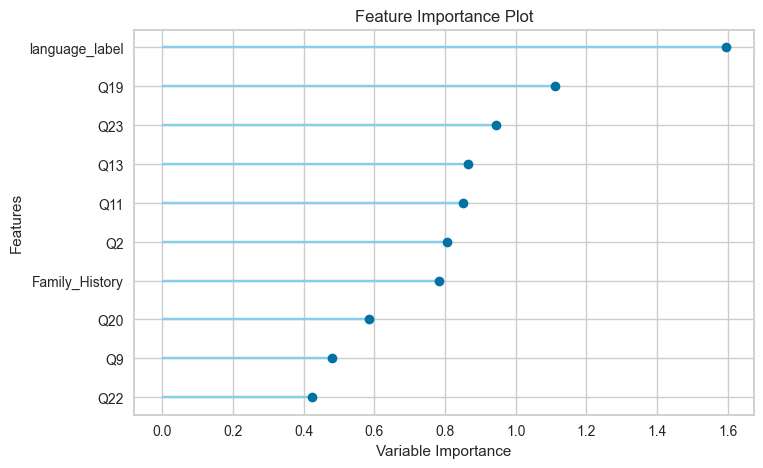

In [8]:
plot_model(final_lr, plot='feature')

In [9]:
evaluate_model(final_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<h2>5. Prediction</h2>

In [10]:
predictions1 = predict_model(final_lr, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7241,0.8043,0.9130,0.7778,0.8400,-0.1154,-0.1390
